<img src='./pic/sharif-main-logo.png' alt="SUT logo" width=300 height=300 align=left class="saturate" > <br>

<div dir=ltr align=center>
<font color=0F5298 size=7>
    Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Fall 2024 <br>
<font color=3C99D size=5>
    Practical Assignment 1 - Supervised Learning <br>
<font color=696880 size=4>
    Erfan Salima, Nikan Vasei, Fatemeh Shiri, Sarina Heshmati

____

# Personal Data

In [2]:
student_number = '401110437'
Name = 'Parsa'
Last_Name = 'Ghezelbash' 

# Libraries

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, RidgeCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures

# Polynomial Regression & Bias-Variance Tradeoff (100 Points)

<font size=4>
Author: Nikan Vasei

## Introduction
In this part, we will explore the **bias-variance tradeoff** using polynomial regression models. Polynomial regression allows us to model complex relationships between an independent variable $X$ and a dependent variable $y$ by introducing higher-degree polynomial terms. However, increasing the complexity of the model can lead to **overfitting** or **underfitting**, which are key concepts in the bias-variance tradeoff.

## Plan
1. **Create a synthetic dataset**: Use the provided quadratic function to generate $X$ and $y$ with noise.
2. **Split the dataset**: Divide the data into training and test sets to evaluate model generalization.
3. **Train polynomial models**: Fit polynomial regression models with degrees ranging from 1 to 10 (or more).
4. **Evaluate performance**: Calculate the MSE for both training and test sets and compare the errors for different polynomial degrees.
5. **Analyze the results**: Use plots to visualize how the error on the training and test sets changes as the model complexity increases.

## Objective
The objective is to determine the degree of the polynomial that best models the relationship between $X$ and $y$ and balances both underfitting and overfitting, i.e., the degree that achieves the best generalization.

## 1. Create a synthetic dataset (15 Points)

Your first task is to define a function that generates a dataset with 1000 samples. The input values for the independent variable $X$ should be randomly selected within the range of **-3 to 3**. To make the dataset more realistic, add noise to the output using a normal distribution with a mean of 0 and a standard deviation of 10.

The relationship between the independent variable $X$ and the dependent variable $y$ is modeled by the following equation:

$$
y = 0.2X^6 - 0.5X^5 + 2X^4 - 5X^3 + 3X^2 - 10X + 5 + \text{noise}
$$

In [4]:
def generate_dataset(range_start, range_end, num_samples=1000, noise_std=10.0):
    X = np.random.uniform(range_start, range_end, num_samples)
    y = 0.2*X**6 - 0.5*X**5 + 2*X**4 - 5*X**3 + 3*X**2 - 10*X + 5*X**0 + np.random.normal(0, noise_std, num_samples)
    
    return X, y

Use a scatter plot to visualize the relationship between $X$ and $y$. This will help you understand the structure of the generated data before moving on to fitting models.

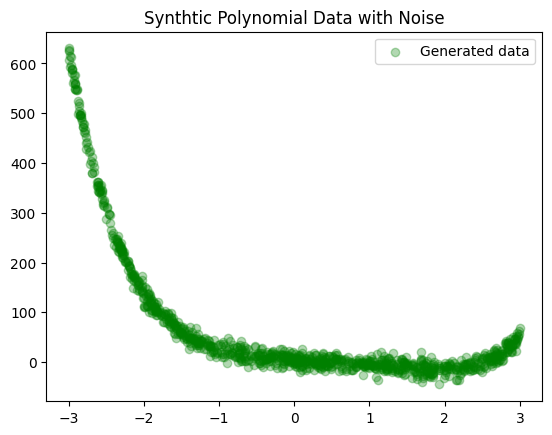

In [5]:
X, y = generate_dataset(-3, 3)

plt.scatter(X, y, label='bubble', alpha=0.3, c='green')
plt.title('Synthtic Polynomial Data with Noise')
plt.legend(['Generated data'])
plt.show()


## 2. Splitting the Dataset (5 Points)

In this task, you should split the dataset into three parts:
1. **Training Set**
2. **In-Range Test Set**: This set should contain data within the same range as the training set.
3. **Out-of-Range Test Set**: This set should contain data in the range **[5, 7]**.

Ensure that the two test sets (In-Range and Out-of-Range) have the same length. You can use the `train_test_split` function from the `sklearn` library for convenience in splitting the data.

In [6]:
X_train, X_test_in, y_train, y_test_in = train_test_split(X, y, test_size=0.2, random_state=42)

mask_in = (X_test_in > -3) & (X_test_in < 3)
X_test_in, y_test_in = X_test_in[mask_in], y_test_in[mask_in]

X_test_out, y_test_out = generate_dataset(5, 7)
mask_out = (X_test_out > 5) & (X_test_out < 7)
X_test_out, y_test_out = X_test_out[mask_out], y_test_out[mask_out]
if X_test_out.shape[0] > X_test_in.shape[0]:
    X_test_out, y_test_out = X_test_out[0:X_test_in.shape[0]], y_test_out[0:X_test_in.shape[0]]

Again, you can use a scatter plot (or similar plots) to visualize the different sets and see their overall distributions.

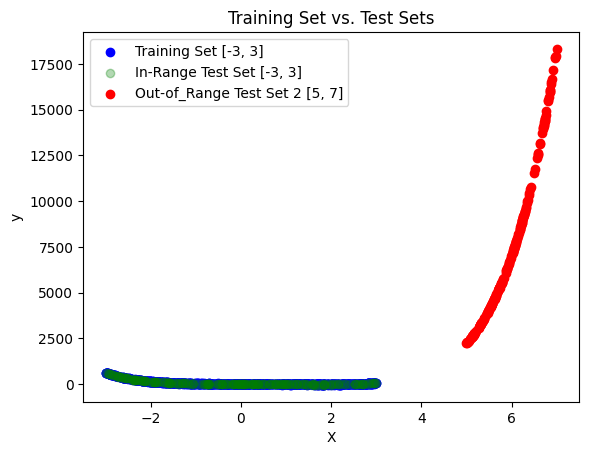

In [7]:
plt.scatter(X_train, y_train, c='blue')
plt.scatter(X_test_in, y_test_in, c='green', alpha=0.3)
plt.scatter(X_test_out, y_test_out, c='red')

plt.xlabel('X')
plt.ylabel('y')

plt.title('Training Set vs. Test Sets')
plt.legend(['Training Set [-3, 3]', 
            'In-Range Test Set [-3, 3]',
            'Out-of_Range Test Set 2 [5, 7]'])

plt.show()

## 3. Polynomial Regression Training (25 Points)

In this task, you should train polynomial regression models with varying degrees, ranging from degree = 2 to degree = 9. You can use the `preprocessing`, `linear_model`, and `pipeline` classes from the `sklearn` library to create and evaluate these models.

In [8]:
def train_models(X, y, degree):
    poly = PolynomialFeatures(degree=degree)
    model = LinearRegression()
    model.fit(poly.fit_transform(X.reshape(-1, 1)), y)
    
    return model

In [9]:
models = {}
degree = 9

for deg in range(degree):
    models[deg+1] = train_models(X_train, y_train, deg+1)

## 4. Model Evaluation (20 Points)

In this task, you should evaluate the polynomial regression models on both test sets (In-Range Test Set and Out-of-Range Test Set) using Mean Squared Error (MSE). This evaluation will help you understand how well each model generalizes to different data ranges.

For each polynomial degree, compute the MSE on both the in-range test set and the out-of-range test set using the `mean_squared_error` function from the `sklearn` library.

In [10]:
def evaluate_models(models, X_test, y_test):
    losses = {}
    for deg in  models:
        poly = PolynomialFeatures(deg)
        X = poly.fit_transform(X_test.reshape(-1, 1))
        losses[deg] = mean_squared_error(y_test, models[deg].predict(X))
    
    return losses

In [11]:
train_losses = evaluate_models(models, X_train, y_train)

test_in_losses = evaluate_models(models, X_test_in, y_test_in)

test_out_losses = evaluate_models(models, X_test_out, y_test_out)

## 5. Analyzing Model Scores (20 Points)

In this task, you will visualize and analyze the performance of polynomial regression models by plotting the **logarithm** (to better visualize differences) of losses (Mean Squared Error, MSE) for both training and test set and also by printing the losses related to each degree.

Make sure to train each model a few times to get a sense of variability in the results.

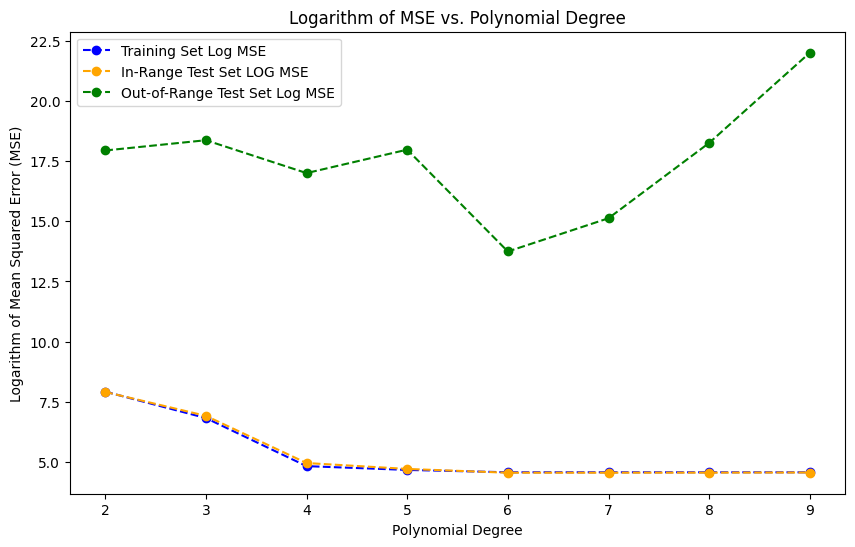

In [12]:
plt.figure(figsize=(10, 6))
degs = range(2, 10)

train_log_losses = np.log(list(train_losses.values())[1:])
test_in_log_losses = np.log(list(test_in_losses.values())[1:])
test_out_log_losses = np.log(list(test_out_losses.values())[1:])

plt.plot(degs, train_log_losses, c='blue', linestyle='--', marker='o')
plt.plot(degs, test_in_log_losses, c='orange', linestyle='--', marker='o')
plt.plot(degs, test_out_log_losses, c='green', linestyle='--', marker='o')

plt.title('Logarithm of MSE vs. Polynomial Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('Logarithm of Mean Squared Error (MSE)')
plt.legend(['Training Set Log MSE', 'In-Range Test Set LOG MSE', 'Out-of-Range Test Set Log MSE'])
plt.show()

In [13]:
data = {'Degree': degs, 'Train MSE': train_log_losses, 'In-Range Test MSE': test_in_log_losses, 'Out-of-Range Test MSE':test_out_log_losses}
df = pd.DataFrame(data=data)
print(df.round(2).to_string(index=False))

 Degree  Train MSE  In-Range Test MSE  Out-of-Range Test MSE
      2       7.92               7.91                  17.94
      3       6.83               6.92                  18.37
      4       4.83               4.96                  17.00
      5       4.67               4.71                  17.98
      6       4.57               4.55                  13.74
      7       4.57               4.56                  15.13
      8       4.57               4.56                  18.25
      9       4.57               4.56                  22.00


## Conclusion (15 Points)

1. Based on your analysis of the training set loss, in-range test set loss, and out-of-range test set loss across different polynomial degrees, summarize what you have learned about the bias-variance tradeoff. How do these losses illustrate the tradeoff between model complexity and performance?

- <span style="color:cyan;">**Answer:** Model complexity increases by increasing degree of polynomial and high complexity models usually have high variance and are high data sensitive. So if we increase the degree of polynomial our train error will decrease, we are forcing the model to be more accurate around our train data points, so in-range test error decreases too. But forcing the model to fit our train data points will cause unusual behaviour out of train data points range, so Ou-of-Range error will increase.</span>

2. Reflecting on the trends observed in the losses as polynomial degree increases, what conclusions can you draw about the effects of model complexity on overfitting and underfitting? How does this understanding help in selecting the appropriate polynomial degree for a model?

- <span style="color:cyan;">**Answer:** as model becomes more complex(in this problem increasing degree of polynomial is equivalent with high complexity) overfitting becomes more probable. in degree=2, we didn't have our best test error because the model was simple and underfitting the data, in the other side when degree=9, Out-of-Range error became larger because model was overfitting the data and could predict well out of it's training data range.</span>

# Regularization (50 Points)

<font size=4>
Author: Fatemeh Shiri

# **Introduction**

In this part, you will work with a real dataset that includes information about the cost of treatment of different patients. The cost of treatment depends on many factors: diagnosis, type of clinic, city of residence, age and so on. <a ref= 'https://github.com/stedy/Machine-Learning-with-R-datasets'>Reference</a>

Columns available:

* age: age of primary beneficiary

* sex: insurance contractor gender, female, male

* bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

* children: Number of children covered by health insurance / Number of dependents

* smoker: Smoking

* region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

* charges: Individual medical costs billed by health insurance

# Plan

- First, you will start by fitting a basic regression model using scikit-learn (sklearn) to establish a baseline for comparison. This basic regression model will serve as a reference point for evaluating the performance of more sophisticated models incorporating regularization techniques.

- Furthermore, you will apply L1 (Lasso) and L2 (Ridge) regularization techniques to refine your predictions and evaluate the impact of these methods on the accuracy of your results. Regularization is a technique used to prevent overfitting by adding a penalty term to the loss function, encouraging simpler models with smaller coefficients. L1 regularization (Lasso) encourages sparsity by penalizing the absolute values of coefficients, while L2 regularization (Ridge) penalizes the square of coefficients. 

# Load and Explore

Load the dataset (as a dataframe) using pandas and display the top 5 rows of the dataframe

In [14]:
file_path = "./InsuranceData.csv"
df = pd.read_csv(file_path)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Get a brief description and do some EDA to get familiar with the dataset

In [15]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max

# Preprocessing

In [16]:
age_scaler = StandardScaler()
bmi_scaler = StandardScaler()
sex_encoder = LabelEncoder()
smoker_encoder = LabelEncoder()
region_encoder = LabelEncoder()

df['age'] = age_scaler.fit_transform(df[['age']])
df['bmi'] = bmi_scaler.fit_transform(df[['bmi']])
df['sex'] = sex_encoder.fit_transform(df['sex'])
df['smoker'] = smoker_encoder.fit_transform(df['smoker'])
df['region'] = region_encoder.fit_transform(df['region'])
df


,age,sex,bmi,children,smoker,region,charges
0,-1.438764,0,-0.453320,0,1,3,16884.92400
1,-1.509965,1,0.509621,1,0,2,1725.55230
2,-0.797954,1,0.383307,3,0,2,4449.46200
3,-0.441948,1,-1.305531,0,0,1,21984.47061
4,-0.513149,1,-0.292556,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,0.768473,1,0.050297,3,0,1,10600.54830
1334,-1.509965,0,0.206139,0,0,0,2205.98080
1335,-1.509965,0,1.014878,0,0,2,1629.83350
1336,-1.296362,0,-0.797813,0,0,3,2007.94500


In [17]:
X = df.drop(['charges'], axis=1)
y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train.shape

(1070,)

# Training

Fit a linear regressor to the data.

In [18]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

Get the coefficients of the variables and visualize it

In [19]:
print(pd.DataFrame(zip(X_train.columns, lr.coef_), columns=['column', 'coefs']).to_string(index=False))

  column        coefs
     age  3610.280430
     sex   -18.791457
     bmi  2046.892957
children   425.091456
  smoker 23647.818096
  region  -271.284266


# Regularization

L1 regularization, also known as Lasso (Least Absolute Shrinkage and Selection Operator) regularization, is a technique used in regression models that encourages simplicity and sparsity in the model coefficients. This is achieved by adding a penalty equal to the absolute value of the magnitude of coefficients to the loss function.\
</br>
Train a regression model using L1 regularization.

In [20]:
ls = Lasso(random_state=42)
ls.fit(X_train, y_train)

Lasso(random_state=42)

L2 regularization, also known as Ridge regularization, is a technique used in regression models to prevent overfitting by adding a penalty equivalent to the square of the magnitude of coefficients to the loss function.
</br>
Train a regression model using L2 regularization.

In [21]:
rg = Ridge(random_state=42)
rg.fit(X_train, y_train)

Ridge(random_state=42)

Test different regularization parameters (alpha) for each regularization method using cross validation and visualize the coefficients of the variables. Use MAPE for evaluation.

**Mean Absolute Percentage Error (MAPE)**:


 is a widely used metric for evaluating the accuracy of forecasting models. It quantifies the prediction error as a percentage, providing an intuitive measure of how far off predictions are from actual values. MAPE is defined as the average of the absolute percentage errors between predicted values and actual values. The formula for calculating MAPE is:

$$
\text{MAPE} = \frac{100}{N} \sum_{t=1}^{N} \left| \frac{A_t - F_t}{A_t} \right|
$$
    
Where:
- $N$ is the number of observations,
- $A_t$ is the actual value,
- $F_t$ is the forecasted value.

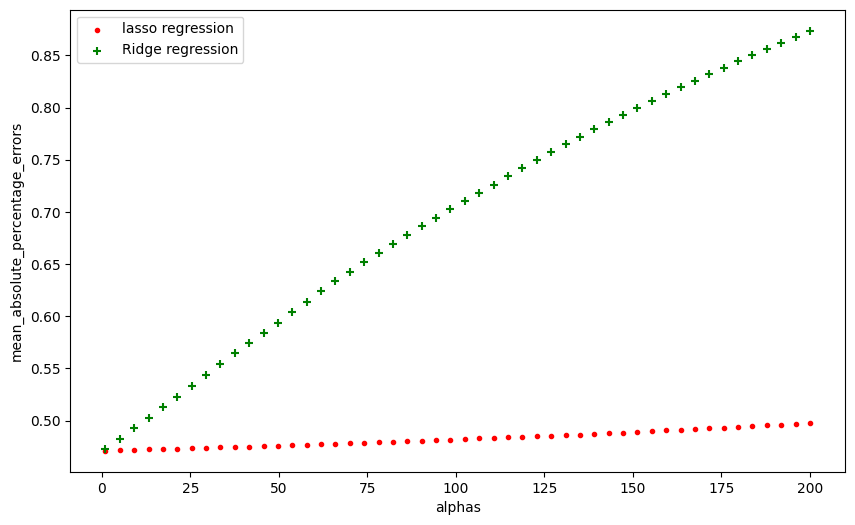

In [22]:
alphas = np.linspace(1, 200)
ls_mape = []
for alpha in alphas:
    ls.alpha = alpha
    ls.fit(X_train, y_train)
    ls_mape.append(mean_absolute_percentage_error(y_test, ls.predict(X_test)))


rg_mape = []

for alpha in alphas:
    rg.alpha = alpha
    rg.fit(X_train, y_train)
    rg_mape.append(mean_absolute_percentage_error(y_test, rg.predict(X_test)))

plt.figure(figsize=(10, 6))
plt.scatter(alphas, ls_mape, c='red', marker='.')
plt.scatter(alphas, rg_mape, c='green', marker='+')
plt.xlabel('alphas')
plt.ylabel('mean_absolute_percentage_errors')
plt.legend(['lasso regression', 'Ridge regression'])
plt.show()

Add extra variables to dataset to make model more complex, then compare the results. 

In [23]:
poly = PolynomialFeatures(degree=3)

X_increased = poly.fit_transform(X)
X_increased = pd.DataFrame(X_increased, columns=[poly.get_feature_names_out(input_features=X.columns)])

X_increased = pd.DataFrame(StandardScaler().fit_transform(X_increased), columns=X_increased.columns)


X_increased_train, X_increased_test, y_increased_train, y_increased_test = train_test_split(X_increased, y, test_size=0.2, random_state=42)
X_increased_train.head()

,1,age,sex,bmi,children,smoker,region,age^2,age sex,age bmi,...,children^3,children^2 smoker,children^2 region,children smoker^2,children smoker region,children region^2,smoker^3,smoker^2 region,smoker region^2,region^3
560,0.0,0.483668,-1.010519,-1.757474,0.751079,-0.507463,-0.466915,-0.881596,0.014674,-0.958183,...,0.015396,-0.269315,-0.014534,-0.330767,-0.260172,-0.261509,-0.507463,-0.396236,-0.346541,-0.746740
1285,0.0,0.554869,-1.010519,-1.040599,-0.908614,-0.507463,-1.372326,-0.796499,0.014674,-0.685865,...,-0.428805,-0.269315,-0.441918,-0.330767,-0.260172,-0.534441,-0.507463,-0.396236,-0.346541,-0.840344
1142,0.0,0.910875,-1.010519,-0.952015,-0.908614,-0.507463,0.438495,-0.195991,0.014674,-0.975296,...,-0.428805,-0.269315,-0.441918,-0.330767,-0.260172,-0.534441,-0.507463,-0.396236,-0.346541,-0.091506
969,0.0,-0.014740,-1.010519,0.599846,3.240619,-0.507463,0.438495,-1.150560,0.014674,-0.117976,...,6.511829,-0.269315,4.900382,-0.330767,-0.260172,2.194881,-0.507463,-0.396236,-0.346541,-0.091506
486,0.0,1.053277,-1.010519,-1.508126,1.580926,-0.507463,-0.466915,0.125891,0.014674,-1.695760,...,1.070372,-0.269315,0.519696,-0.330767,-0.260172,-0.125043,-0.507463,-0.396236,-0.346541,-0.746740


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.137e+09, tolerance: 1.544e+07
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.313e+07, tolerance: 1.544e+07
  model = cd_fast.enet_coordinate_descent(
/Users/parsa/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 7 () missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


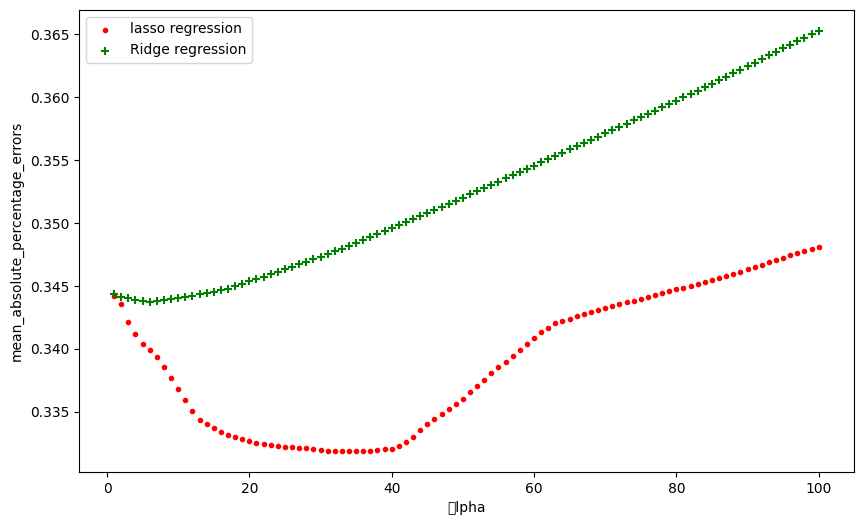

In [24]:
alphas = np.linspace(1, 100, 100)

ls_mape = []
for alpha in alphas:
    ls.alpha = alpha
    ls.fit(X_increased_train, y_increased_train)
    ls_mape.append(mean_absolute_percentage_error(y_increased_test, ls.predict(X_increased_test)))

rg_mape = []
for alpha in alphas:
    rg.alpha = alpha
    rg.fit(X_increased_train, y_increased_train)
    rg_mape.append(mean_absolute_percentage_error(y_increased_test, rg.predict(X_increased_test)))

plt.figure(figsize=(10, 6))
plt.scatter(alphas, ls_mape, c='red', marker='.')
plt.scatter(alphas, rg_mape, c='green', marker='+')
plt.xlabel('\alpha')
plt.ylabel('mean_absolute_percentage_errors')
plt.legend(['lasso regression', 'Ridge regression'])
plt.show()

Report your best model with its evaluated results.

In [25]:
ls.alpha = alphas[np.argmin(ls_mape)]
ls.fit(X_increased_train, y_increased_train)
print(f"Lasso best alpha: {ls.alpha}")
print(f"Lasso Train set MAPE: {mean_absolute_percentage_error(y_increased_train, ls.predict(X_increased_train))}")
print(f"Lasso Test set MAPE: {mean_absolute_percentage_error(y_increased_test, ls.predict(X_increased_test))}")


rg.alpha = alphas[np.argmin(rg_mape)]
rg.fit(X_increased_train, y_increased_train)
print(f"Ridge best alpha: {rg.alpha}")
print(f"Ridge Train set MAPE: {mean_absolute_percentage_error(y_increased_train, rg.predict(X_increased_train))}")
print(f"Ridge Test set MAPE: {mean_absolute_percentage_error(y_increased_test, rg.predict(X_increased_test))}")

Lasso best alpha: 32.0
Lasso Train set MAPE: 0.3032266204236215
Lasso Test set MAPE: 0.3318833707629601
Ridge best alpha: 6.0
Ridge Train set MAPE: 0.2964237531658938
Ridge Test set MAPE: 0.3437249352198162


In [26]:
file_path = "./InsuranceData_test.csv"
df = pd.read_csv(file_path)
df.head()

,age,sex,bmi,children,smoker,region
0,42,female,24.763,2,yes,northwest
1,41,male,26.454,3,no,northeast
2,52,male,37.093,0,no,southwest
3,52,female,38.641,1,no,southeast
4,64,female,36.380,0,no,southeast


In [29]:
df['age'] = age_scaler.fit_transform(df[['age']])
df['bmi'] = bmi_scaler.fit_transform(df[['bmi']])
df['sex'] = sex_encoder.fit_transform(df['sex'])
df['smoker'] = smoker_encoder.fit_transform(df['smoker'])
df['region'] = region_encoder.fit_transform(df['region'])

X_increased = poly.fit_transform(df)
X_increased = pd.DataFrame(X_increased, columns=[poly.get_feature_names_out(input_features=X.columns)])

X_increased = pd.DataFrame(StandardScaler().fit_transform(X_increased), columns=X_increased.columns)
X_increased.head()

,1,age,sex,bmi,children,smoker,region,age^2,age sex,age bmi,...,children^3,children^2 smoker,children^2 region,children smoker^2,children smoker region,children region^2,smoker^3,smoker^2 region,smoker region^2,region^3
0,0.0,0.188230,-1.015169,-0.920704,0.763521,2.193741,-0.479027,-1.105652,0.036983,-0.306739,...,0.028195,2.492593,-0.026057,3.205861,1.644418,-0.267254,2.193741,1.073599,0.251499,-0.747461
1,0.0,0.116369,0.985058,-0.641734,1.606840,-0.455842,-1.391926,-1.130743,0.194467,-0.209166,...,1.115989,-0.242642,-0.440299,-0.289392,-0.209290,-0.532512,-0.455842,-0.352754,-0.310747,-0.841095
2,0.0,0.906843,0.985058,1.113421,-0.923117,-0.455842,1.346772,-0.203617,1.264225,0.863629,...,-0.429823,-0.242642,-0.440299,-0.289392,-0.209290,-0.532512,-0.455842,-0.352754,-0.310747,1.687022
3,0.0,0.906843,-1.015169,1.368800,-0.079798,-0.455842,0.433872,-0.203617,0.036983,1.092744,...,-0.372571,-0.242642,-0.233178,-0.289392,-0.209290,-0.001997,-0.455842,-0.352754,-0.310747,-0.092023
4,0.0,1.769179,-1.015169,0.995795,-0.923117,-0.455842,0.433872,2.441539,0.036983,1.607637,...,-0.429823,-0.242642,-0.440299,-0.289392,-0.209290,-0.532512,-0.455842,-0.352754,-0.310747,-0.092023


In [32]:
y = pd.DataFrame(ls.predict(X_increased), columns=['charges'])
y.head()

,charges
0,25104.697271
1,9669.722058
2,11441.109519
3,12371.224306
4,16377.842416


In [33]:
output_path = "./submission.csv"
y.to_csv(output_path)

## Questions

1. Compare the weight distribution when applying L1/L2 regularization and their sparsity?




- <span style="color:cyan;">**Answer:** L1 regularization weights are more sparse than L2 regularization weights</span>


2. How does the regularization parameter (alpha) affect each feature? Does it help to model's explainability?

- <span style="color:cyan;">**Answer:** In lasso regression, by increasing alpha the model will have more zero weights and will remove less important features and will become more explainable. In Ridge regression, weights will not become exactly zero so no features will be removed, but they will get a weight according to their relevence to output but it will be less explainable.</span>

3. How does the regularization affect dimension expansion?

- <span style="color:cyan;">**Answer:** According to plots that I drew in both normal dataset and expanded dataset, mean absolute percentage error was lower when we used regularization on expanded dataset. So regularization and dimension expansion help decreasing error.</span>